In [6]:
import pandas as pd # Importing modules for use.
import numpy as np
import matplotlib.pyplot as plt # FOr plotting scatter plot

In [7]:
# Set the plotting DPI settings to be a bit higher.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7.0, 4.5]
plt.rcParams['figure.dpi'] = 150

# Decision Tree Classification

In [8]:
# Code from Book: Build Your Own AI Investor
# Damon Lee 2021
# Check out the performance on www.valueinvestingai.com
# Code uses data from the (presumably) nice people at https://simfin.com/. 
# Feel free to fork this code for others to see what can be done with it.

In [9]:
data = pd.read_csv('Altman_Z_2D.csv') # Load the .csv data

In [10]:
data.head(5) # Taking a look at the data.

,Bankrupt,EBIT/Total Assets,MktValEquity/Debt
0,False,27.693875,8.415582
1,False,-14.302305,8.878080
2,True,-20.515623,-8.742365
3,False,29.729424,4.878042
4,False,32.856383,1.107730


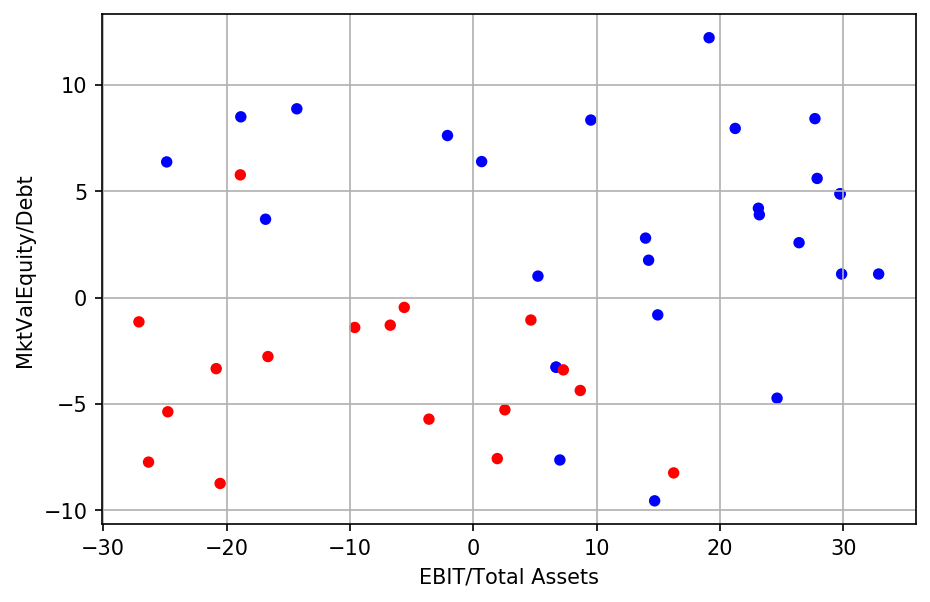

In [11]:
#With colours, not good for book.
colours = np.where(data['Bankrupt'], 'r', 'b') # here we define separate colours for True and False
data.plot.scatter(x='EBIT/Total Assets', y='MktValEquity/Debt',\
                  c = colours, grid='on'); # Specify X and Y in Scatterplots

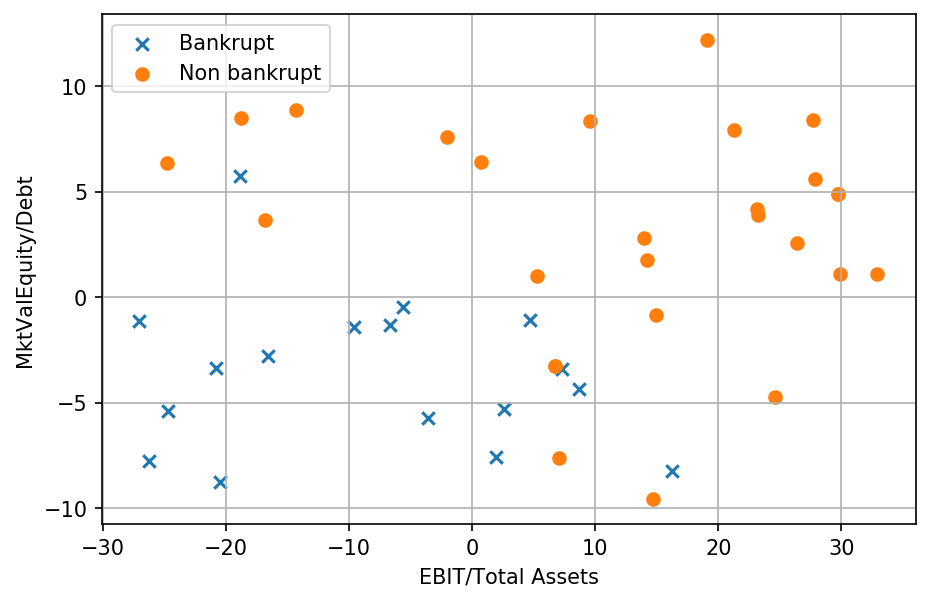

In [12]:
# Bankruptcy mask (list of booleans)
bankrupt_mask = data['Bankrupt']==True

# Plot the bankrupt points
plt.scatter(data['EBIT/Total Assets'][bankrupt_mask],\
            data['MktValEquity/Debt'][bankrupt_mask],\
           marker='x')

# Plot the nonbankrupt points
plt.scatter(data['EBIT/Total Assets'][~bankrupt_mask],\
            data['MktValEquity/Debt'][~bankrupt_mask],\
           marker='o')

# Formatting
plt.xlabel('EBIT/Total Assets')
plt.ylabel('MktValEquity/Debt')
plt.grid()
plt.legend(['Bankrupt','Non bankrupt'])

# Exercise 7 on Decision Tree

In [13]:
# Oh no, Toby has messed up the code again. Try and get it working,
# I think some code is missing where "?" is placed.

Text(0, 0.5, 'Prediction Accuracy')

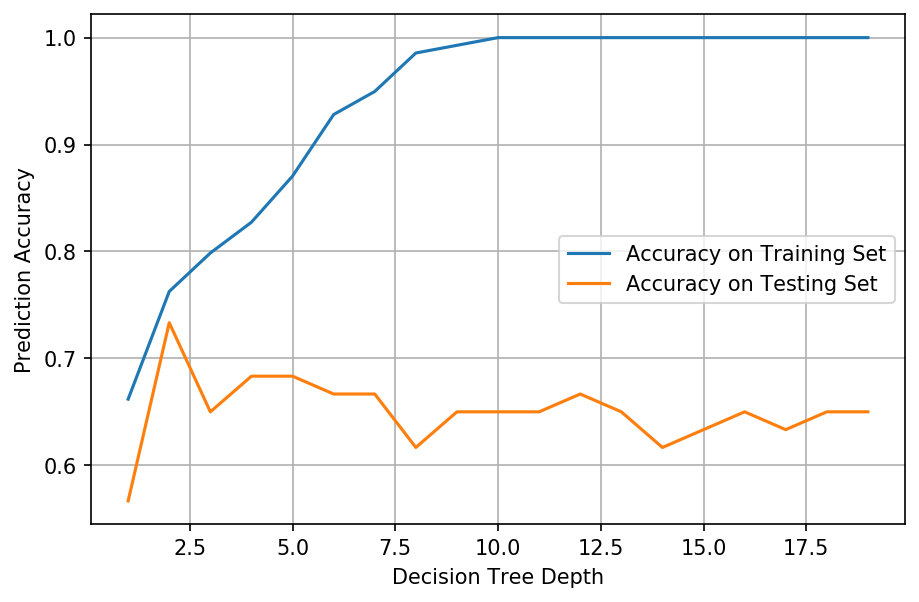

In [15]:
'''
Here we want to plot the prediction accuracy with increasing decision tree depth
We want two accuracy lines plotted, one for accuracy vs. the testing set and
one for the accuracy vs the training set. 

We want to plot the tree depth from 1 to about 20.
We will loop through possible tree depth numbers, fitting our model with a different
tree depth with each loop, and appending the accuracy result to a list.

We will plot the list at the end.
'''

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('Altman_Z_2D_Large.csv', index_col=0) # Load the .csv data

X = data[['EBIT/Total Assets','MktValEquity/Debt']]
Y = data['Bankrupt']

from sklearn.model_selection import train_test_split # need to import
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

scores_train, scores_test = [], []
level = 20
for i in range(1, level):
    tree_clf = DecisionTreeClassifier(max_depth=i) # create a DecisionTreeClassifier object first
    tree_clf.fit(X_train, y_train) # Fit the decision tree to our training data of X and Y.
    scores_train.append(accuracy_score(tree_clf.predict(X_train), y_train))
    scores_test.append(accuracy_score(tree_clf.predict(X_test), y_test))

plt.plot(range(1,level), scores_train, range(1,level), scores_test)
plt.legend(('Accuracy on Training Set','Accuracy on Testing Set'))
plt.grid()
plt.xlabel('Decision Tree Depth')
plt.ylabel('Prediction Accuracy')